## Penyeimbangan Data Ecoli Serta Perbandingan SMOTE dan ADASYN dan Klasifikasi NAIVE BAYES dan RANDOM FOREST


Penyeimbangan data Ecoli dilakukan untuk mengatasi masalah ketidakseimbangan kelas, di mana jumlah data pada kelas mayoritas jauh lebih banyak dibandingkan kelas minoritas. Jika dibiarkan, model machine learning cenderung bias dengan hanya mengenali kelas mayoritas, sementara kelas minoritas yang justru sering memiliki informasi biologis penting terabaikan. Dengan menyeimbangkan data, distribusi antar kelas menjadi lebih adil sehingga model mampu belajar secara seimbang



### Mendownload Dataset Ecoli dari UCI [https://archive.ics.uci.edu/dataset/39/ecoli](https://archive.ics.uci.edu/dataset/39/ecoli)

Kunjungi halaman UCI berikut untuk mendapatkan dataset Ecoli,setelah itu lanjutkan dengan menekan tombol download untuk mendownload datasetnya

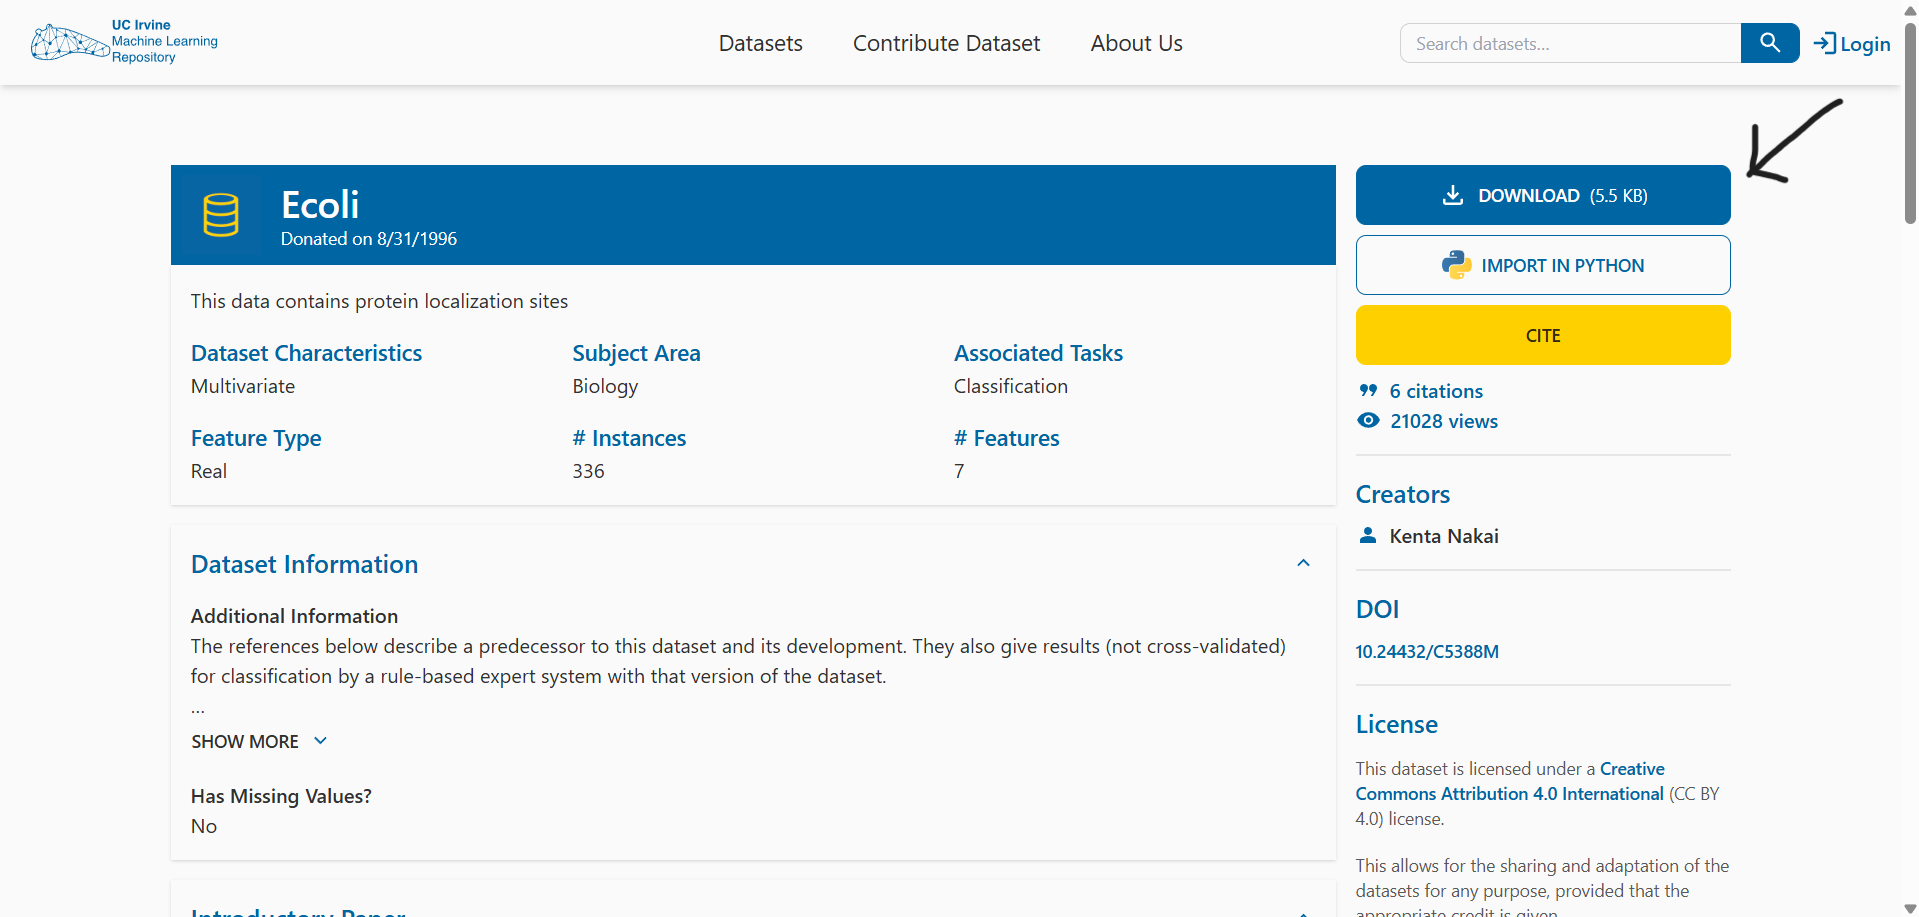

Namun sebelum dimasukkan kedalam Database Mysql Dataset Ecoli tersebut harus dikonversi terlebih dahulu karena format dari Dataset ini bukanlah csv

jadi saya membuat kode untuk mengubah format Dataset Ecoli ini agar menjadi csv.Berikut adalah kode nya:

In [ ]:
import pandas as pd

# Nama file input dan output
nama_file_data = 'ecoli.data'
nama_file_csv = 'ecoli.csv'

# NAMA KOLOM BARU SESUAI PERMINTAAN ANDA
nama_kolom = [
    'id_protein',
    'feature1',
    'feature2',
    'feature3',
    'feature4',
    'feature5',
    'feature6',
    'feature7',
    'class_label'
]

try:
    # Membaca file .data
    # sep='\s+' akan menangani pemisah berupa satu atau lebih spasi
    df = pd.read_csv(nama_file_data, sep='\s+', header=None, names=nama_kolom)

    # Menyimpan ke file CSV tanpa kolom indeks
    df.to_csv(nama_file_csv, index=False)

    print(f" Berhasil! File '{nama_file_data}' telah diubah menjadi '{nama_file_csv}' dengan kolom baru.")

except FileNotFoundError:
    print(f" Gagal! Pastikan file '{nama_file_data}' berada di folder yang sama dengan script ini.")
except Exception as e:
    print(f"Terjadi error: {e}")

### Membuat Database Mysql dan Menyimpan datanya
Proses pembuatan database Mysql menggunakan database cloud [aiven.io](https://aiven.io/) dan dbeaver sebagai tempat untuk menyimpan suatu datanya. kemudian mengkoneksikan aiven ke dbeaver melalui kredensial yang dimiliki project aiven. Selanjutnya, membuat database pada service dan mengimport data dalam bentuk csv..  



### Membuat Service Mysql  pada [aiven.io ](https://aiven.io/)



*   Kunjungi laman situs aiven.io melalui link https://aiven.io/



*   Silahkan login terlebih dahulu jika
belum memiliki akun aiven
*   Buat Project terlebih dahulu sebelum membuat servicenya.


*   Buat Project terlebih dahulu sebelum membuat servicenya.
*   Klik “Create Service” dan pilih databse Postgre sebagai databasenya.


*  Buat Service untuk MySQL








  









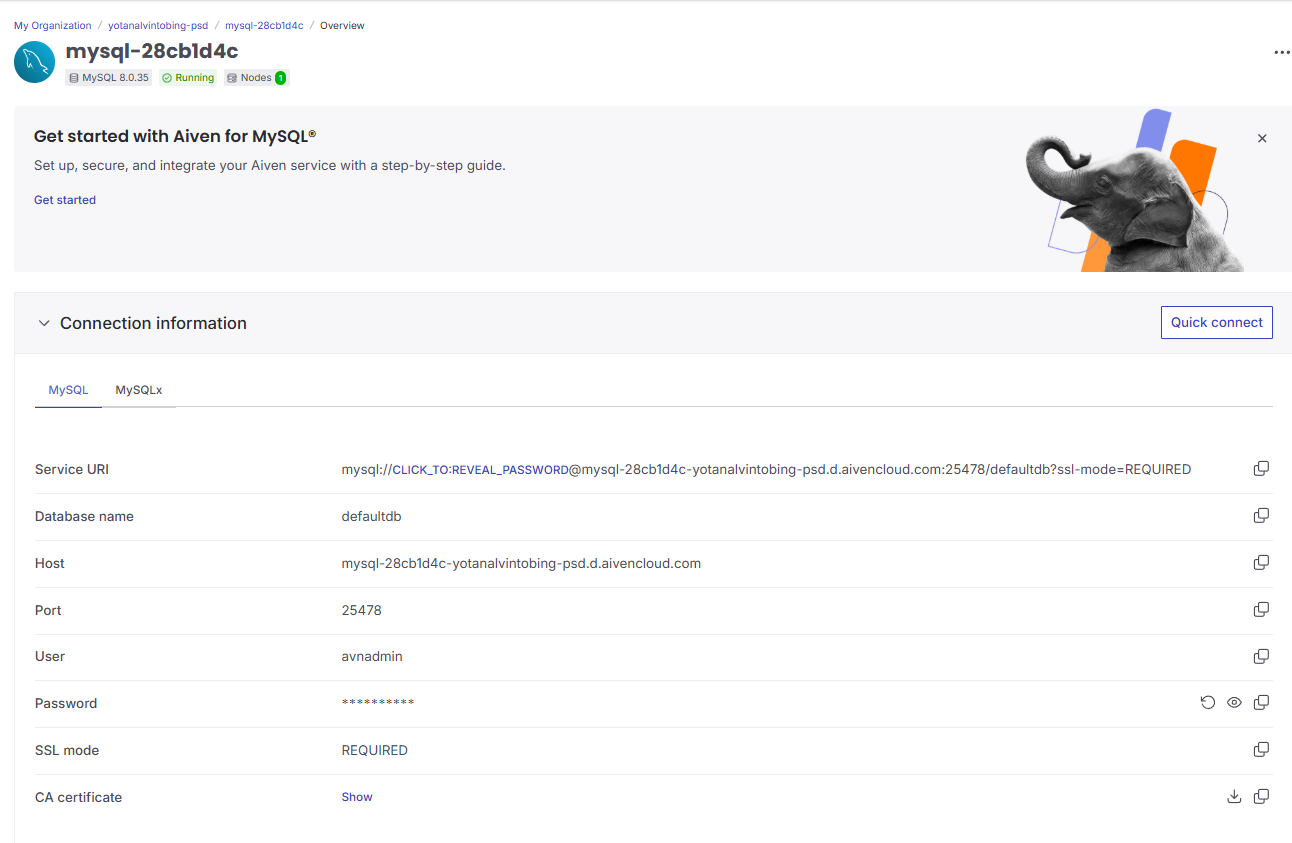

### Koneksikan [aiven.io](https://aiven.io/) ke Dbeaver

Data Ecoli tersebut akan disimpan pada Dbeaver dan akan dikoneksikan kepada [aiven.io](https://aiven.io/)

berikut adalah cara membuat database Mysql di Dbeaver



*   Install Dbeaver melalui sites resmi https://dbeaver.io/download/.

*   Buat Database baru dengan source MySQL  pada Dbeaver.

*   Koneksikan Database dengan cloud Database aiven melalui kredensial service MySQL yang disediakan aiven.io.
*   Buat tabel database terlebih dahulu dengan “SQL Editor -> Open SQL Script”.


*   Setelah tabel terbuat. Insert data MySQL dengan data Ecoli,
### Simpan Dataset Ecoli didalam Mysql












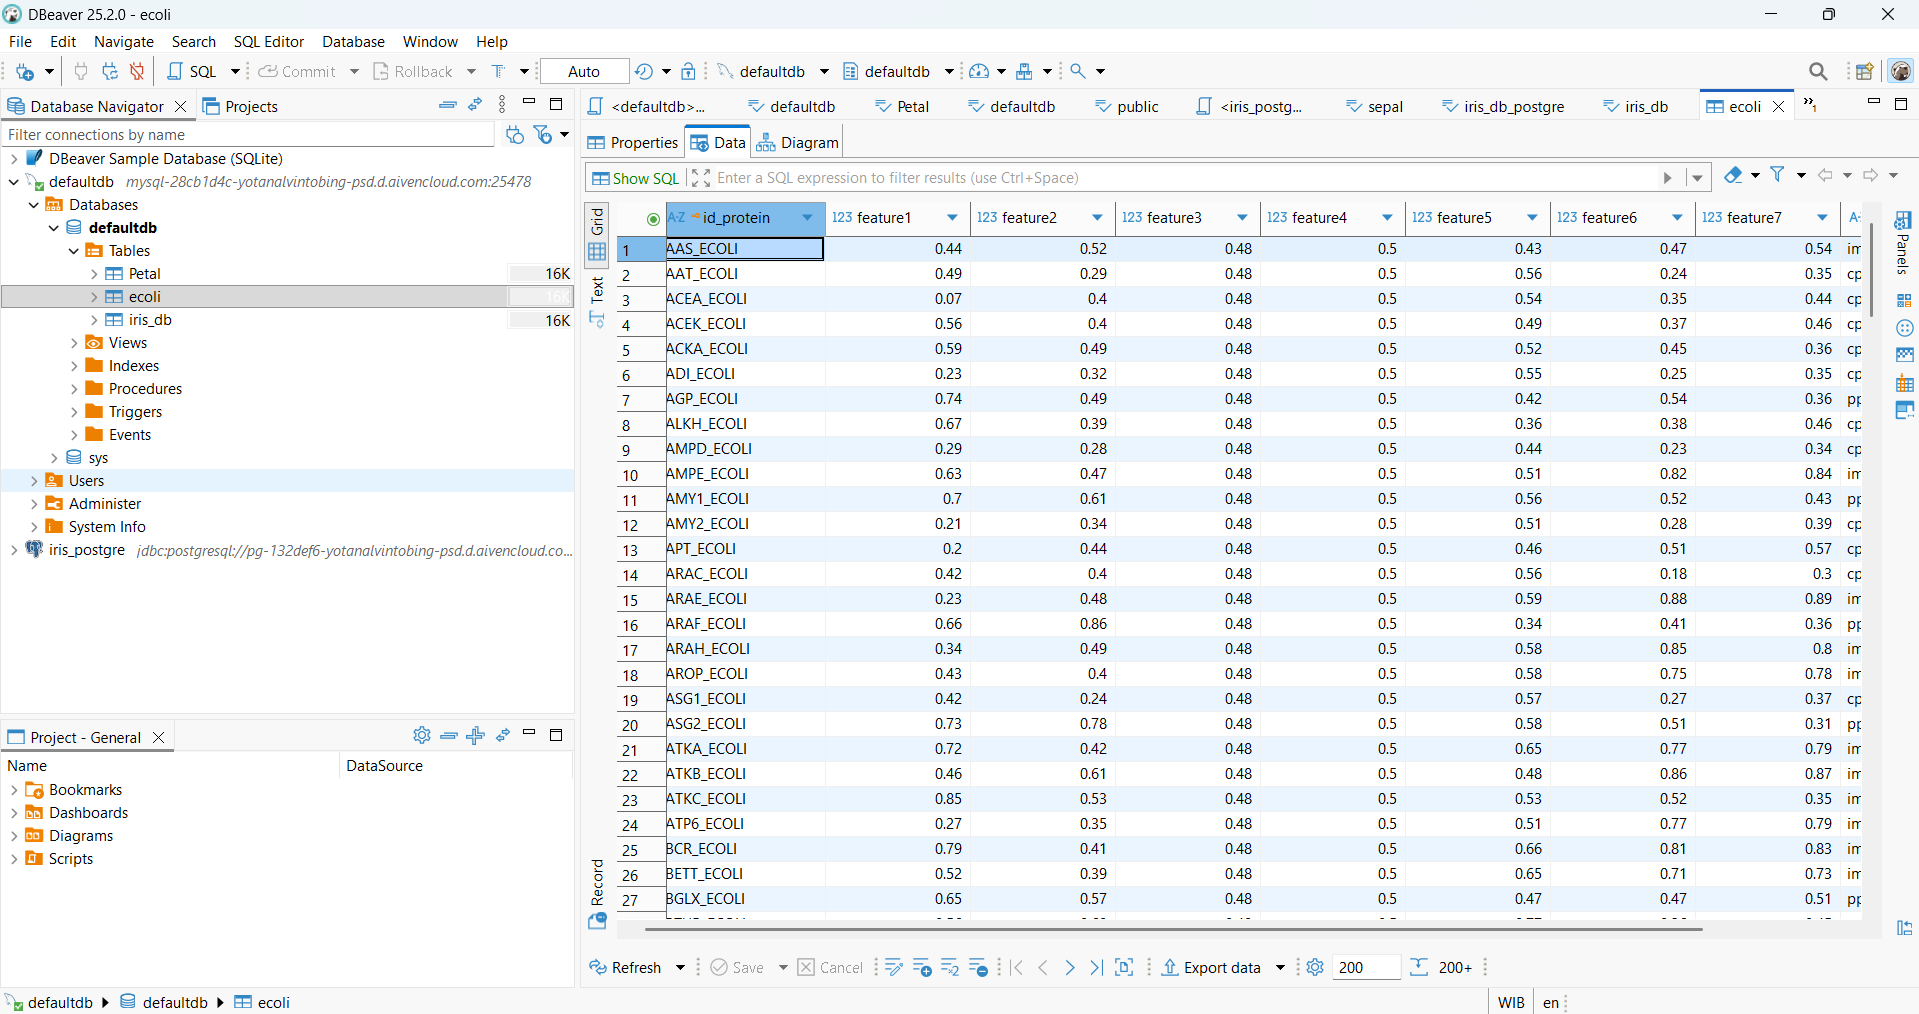

### Tampilkan data dalam scatter plot  menggunakan PCA

Sebelum menampilkan kedalam bentuk scatter plot kita harus menginstal library,menyambungkan ke aiven

berikut adalah kodenya:

In [1]:
!pip install pymysql sqlalchemy imbalanced-learn

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from collections import Counter

host = "mysql-28cb1d4c-yotanalvintobing-psd.d.aivencloud.com"
port = 25478   # jangan lupa tambahkan port
user = "avnadmin"
password = "AVNS_e3Tzp6XE6YCGJ7fV9ku"
database = "defaultdb"

# Buat koneksi
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# Ambil dataset ecoli dari tabel
query = "SELECT * FROM ecoli;"
df = pd.read_sql(query, engine)

print("Jumlah baris:", len(df))
print(df.head())

# Pisahkan fitur & label
X = df[[f"feature{i}" for i in range(1, 8)]].values
y = df["class_label"].values



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip
Jumlah baris: 336
   id_protein  feature1  feature2  feature3  feature4  feature5  feature6  \
0   AAS_ECOLI      0.44      0.52      0.48       0.5      0.43      0.47   
1   AAT_ECOLI      0.49      0.29      0.48       0.5      0.56      0.24   
2  ACEA_ECOLI      0.07      0.40      0.48       0.5      0.54      0.35   
3  ACEK_ECOLI      0.56      0.40      0.48       0.5      0.49      0.37   
4  ACKA_ECOLI      0.59      0.49      0.48       0.5      0.52      0.45   

   feature7 class_label  
0      0.54          im  
1      0.35          cp  
2      0.44          cp  
3      0.46          cp  
4      0.36          cp  


Penjelasan Kode:

*   Install library → memastikan pymysql, sqlalchemy, dan imbalanced-learn tersedia.

*   Koneksi ke MySQL Aiven → menggunakan create_engine dengan host, port, user, password, database.
*  Ambil data dari tabel ecoli → query SQL SELECT * FROM ecoli;.
*   Pisahkan fitur & label →
    *   X = kolom feature1 s/d feature7
    *   y = kolom class_label





### Tampilkan data dalam scatter plot  menggunakan PCA
Setelah itu masuk ketahap menampilkan data kedalam scatter plot menggunakan PCA yang dimana PCA mentransformasi data menjadi dimensi rendah (2)

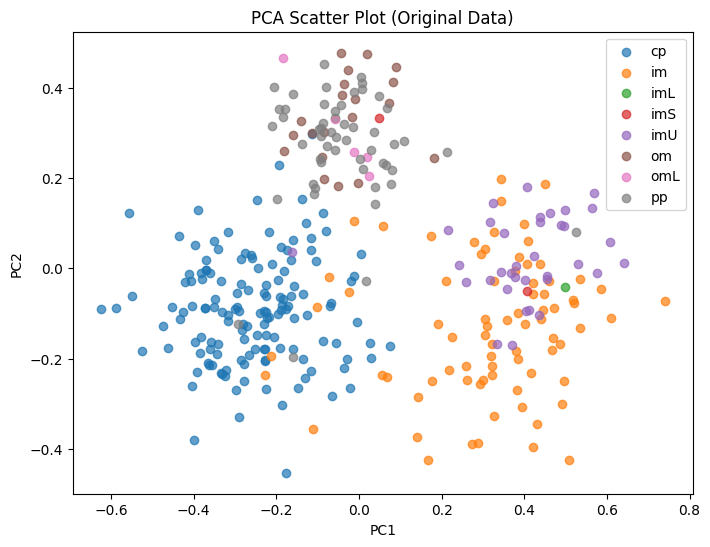

In [2]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    idx = (y == label)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=label, alpha=0.7)

plt.title("PCA Scatter Plot (Original Data)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(); plt.show()

* PCA dipakai untuk menurunkan dimensi dari 7 fitur → 2 dimensi (PC1 & PC2).

* Visualisasi:

    * Data ditampilkan dalam scatter plot.

    * Setiap kelas (class_label) digambarkan dengan warna berbeda.

    * Memberi gambaran distribusi asli antar kelas.

### Lakukan penyeimbangan data menggunakan ADASYN 

In [3]:
print("Distribusi kelas sebelum balancing:", Counter(y))

max_class_size = max(Counter(y).values())
X_res, y_res = [], []

for cls in np.unique(y):
    X_cls = X[y == cls]
    n_samples = len(X_cls)
    n_to_add = max_class_size - n_samples

    # simpan data asli
    X_res.append(X_cls)
    y_res.extend([cls] * n_samples)

    # buat data sintetis jika perlu
    if n_to_add > 0:
        idx_choice = np.random.choice(range(n_samples), size=n_to_add, replace=True)
        X_new = X_cls[idx_choice].copy()

        # tambahkan noise kecil → mirip prinsip ADASYN
        noise = np.random.normal(0, 0.01, X_new.shape)
        X_new = X_new + noise

        X_res.append(X_new)
        y_res.extend([cls] * n_to_add)

# gabungkan
X_res = np.vstack(X_res)
y_res = np.array(y_res)

print("Distribusi kelas setelah balancing:", Counter(y_res))


Distribusi kelas sebelum balancing: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Distribusi kelas setelah balancing: Counter({'cp': 143, 'im': 143, 'imL': 143, 'imS': 143, 'imU': 143, 'om': 143, 'omL': 143, 'pp': 143})


Penjelasan:

* Hitung distribusi kelas awal dengan Counter(y).

* Tentukan target jumlah data per kelas → disamakan dengan kelas mayoritas.

* Untuk setiap kelas:

    * Simpan data aslinya.

    * Hitung kekurangan jumlah sampel dibanding kelas mayoritas.

    * Jika masih kurang → buat data sintetis dengan:

        * Sampling data asli dengan replacement.

        * Tambahkan noise acak kecil agar variatif (mirip prinsip ADASYN).

* Gabungkan hasil → X_res (fitur hasil balancing) dan y_res (label hasil balancing).

* Cetak distribusi kelas setelah balancing → harus lebih seimbang.

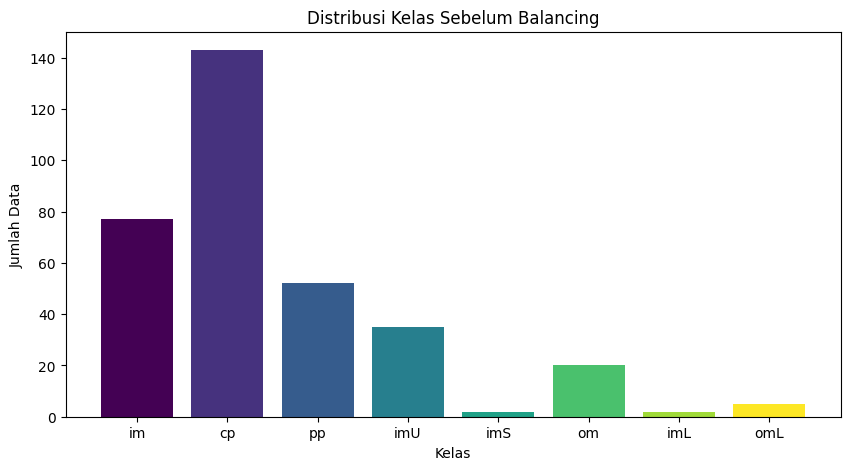

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung distribusi sebelum balancing
class_counts_before = Counter(y)
classes_before = list(class_counts_before.keys())
counts_before = list(class_counts_before.values())

# Buat daftar warna untuk setiap batang
colors_before = plt.cm.viridis(np.linspace(0, 1, len(classes_before)))

# Plot grafik batang sebelum balancing
plt.figure(figsize=(10,5))
plt.bar(classes_before, counts_before, color=colors_before)
plt.title("Distribusi Kelas Sebelum Balancing")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

### Grafik Sebelum Balancing

Grafik ini menampilkan jumlah data asli dari dataset ecoli sebelum dilakukan balancing.

Terlihat perbedaan yang sangat besar antar kelas:

* Kelas cp paling banyak → 143 data.

* Kelas im lumayan besar → 77 data.

* Kelas pp sedang → 52 data.

* Kelas kecil seperti imU (35), om (20), omL (5).

* Sangat kecil: imS (2) dan imL (2).

Implikasi:

Dataset sangat tidak seimbang (imbalanced).

Jika digunakan langsung untuk training, model akan condong bias ke kelas mayoritas (misalnya sering menebak cp), sementara kelas minoritas seperti imS bisa diabaikan model.

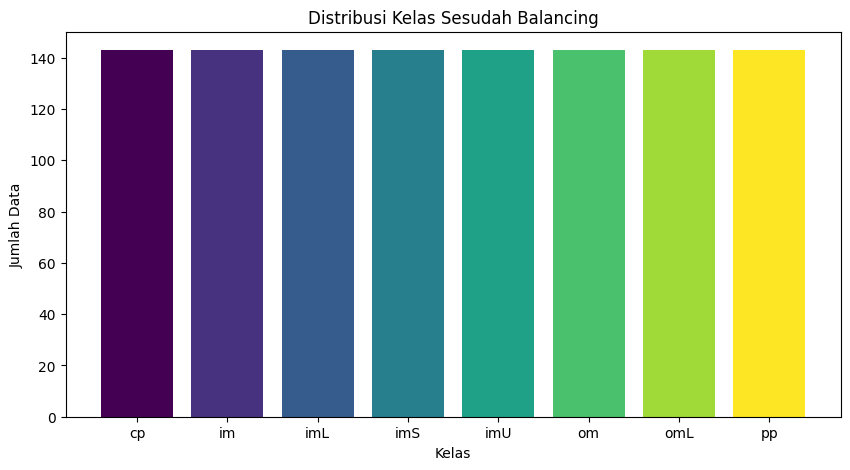

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Hitung distribusi sesudah balancing
class_counts_after = Counter(y_res)
classes_after = list(class_counts_after.keys())
counts_after = list(class_counts_after.values())

# Buat daftar warna untuk setiap batang
colors_after = plt.cm.viridis(np.linspace(0, 1, len(classes_after)))

# Plot grafik batang sesudah balancing
plt.figure(figsize=(10,5))
plt.bar(classes_after, counts_after, color=colors_after)
plt.title("Distribusi Kelas Sesudah Balancing")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

### Grafik Sesudah balancing

Grafik ini menampilkan jumlah data setelah dilakukan balancing dengan teknik oversampling sintetis (mirip ADASYN/SMOTE sederhana).

* Semua kelas sekarang punya jumlah yang sama rata → 143 data.

* Tidak ada lagi kelas minoritas yang “tertinggal”, karena data tambahan dibuat dengan:

* Menggandakan data kelas kecil.

* Menambahkan noise kecil supaya tidak sekadar duplikat.

Implikasi:

* Dataset sudah balanced, sehingga model machine learning akan belajar tiap kelas dengan proporsi yang adil.

* Kelas yang tadinya hanya punya 2 data (imS, imL) sekarang punya data sintetis hingga jumlahnya sama dengan kelas besar.

* Risiko: karena mayoritas data di kelas ini sintetis, ada kemungkinan model jadi overfitting pada pola buatan.

### Ploting data dari data yang diimbangkan menggunakan PCA, tandai data data hasil generatenya

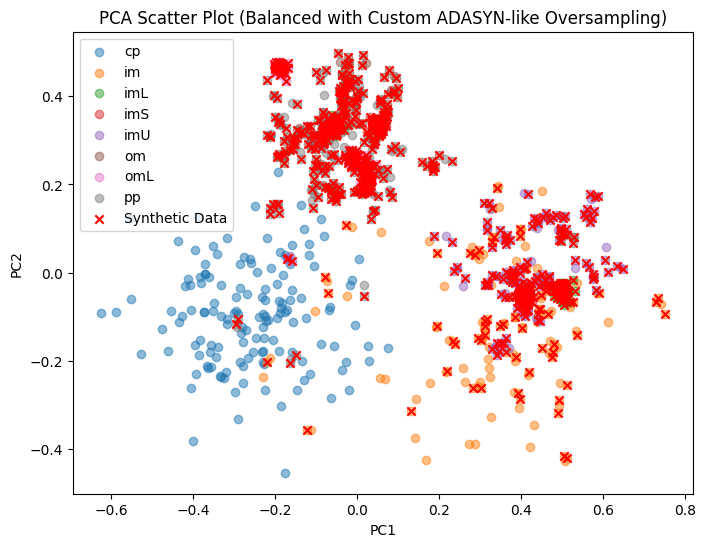

In [6]:
# Tandai data sintetis
X_rounded = np.round(X, 5)
X_res_rounded = np.round(X_res, 5)
synthetic_mask = [tuple(x) not in set(map(tuple, X_rounded)) for x in X_res_rounded]

# PCA transform
X_res_pca = pca.transform(X_res)

plt.figure(figsize=(8,6))
for label in np.unique(y_res):
    idx = (y_res == label)
    plt.scatter(X_res_pca[idx,0], X_res_pca[idx,1], label=label, alpha=0.5)

# Synthetic data → X merah
plt.scatter(X_res_pca[synthetic_mask,0], X_res_pca[synthetic_mask,1],
            c="red", marker="x", label="Synthetic Data")

plt.title("PCA Scatter Plot (Balanced with Custom ADASYN-like Oversampling)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(); plt.show()


Penjelasan:
* Identifikasi data sintetis dengan membandingkan data baru dengan data asli.

* PCA diterapkan lagi pada data hasil balancing (X_res).

* Scatter plot hasil balancing:

* Semua kelas ditampilkan kembali dengan warna berbeda.

* Data sintetis ditandai dengan simbol X merah → agar jelas mana yang asli dan mana yang hasil generate.

* Hasil ini menunjukkan bahwa distribusi data sudah lebih seimbang.

### Klasifikasi NAIVE BAYES SEBELUM ADASYN

=== Hasil Naive Bayes SEBELUM Balancing ===
Akurasi: 0.8316831683168316

Classification Report:
              precision    recall  f1-score   support

          cp       0.96      1.00      0.98        43
          im       0.76      0.70      0.73        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.50      0.40      0.44        10
          om       1.00      0.67      0.80         6
         omL       0.50      1.00      0.67         1
          pp       0.76      1.00      0.86        16

    accuracy                           0.83       101
   macro avg       0.56      0.60      0.56       101
weighted avg       0.81      0.83      0.82       101



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


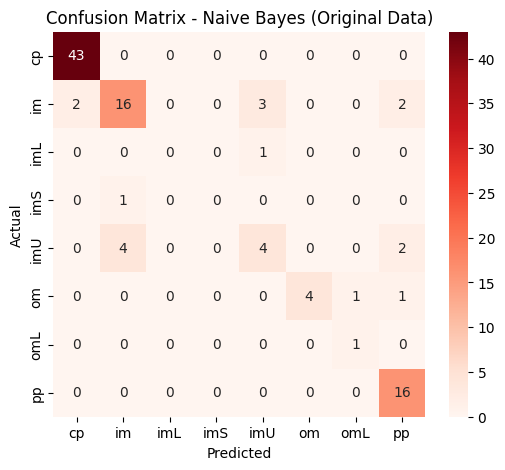

In [7]:
# === Klasifikasi Naive Bayes SEBELUM balancing ===
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# Split data original
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Model Naive Bayes
nb_ori = GaussianNB()
nb_ori.fit(X_train_ori, y_train_ori)

# Prediksi
y_pred_ori = nb_ori.predict(X_test_ori)

# Evaluasi
print("=== Hasil Naive Bayes SEBELUM Balancing ===")
print("Akurasi:", accuracy_score(y_test_ori, y_pred_ori))
print("\nClassification Report:")
print(classification_report(y_test_ori, y_pred_ori))

# Confusion Matrix
cm_ori = confusion_matrix(y_test_ori, y_pred_ori)
plt.figure(figsize=(6,5))
sns.heatmap(cm_ori, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Original Data)")
plt.show()




### Klasifikasi NAIVE BAYES Setelah ADASYN


=== Hasil Naive Bayes SESUDAH Balancing ===
Akurasi: 0.8430232558139535

Classification Report:
              precision    recall  f1-score   support

          cp       0.62      1.00      0.77        43
          im       0.87      0.60      0.71        43
         imL       1.00      1.00      1.00        43
         imS       0.87      0.95      0.91        43
         imU       0.85      0.77      0.80        43
          om       1.00      0.79      0.88        43
         omL       1.00      1.00      1.00        43
          pp       0.69      0.63      0.66        43

    accuracy                           0.84       344
   macro avg       0.86      0.84      0.84       344
weighted avg       0.86      0.84      0.84       344



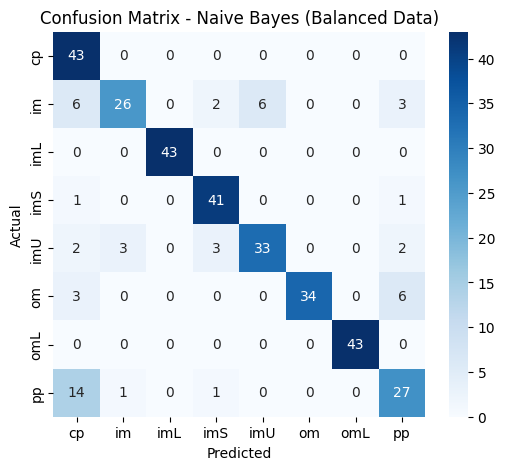

In [8]:
# === Klasifikasi Naive Bayes SESUDAH balancing (custom ADASYN) ===

# Split data balanced
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Model Naive Bayes
nb_bal = GaussianNB()
nb_bal.fit(X_train_bal, y_train_bal)

# Prediksi
y_pred_bal = nb_bal.predict(X_test_bal)

# Evaluasi
print("\n=== Hasil Naive Bayes SESUDAH Balancing ===")
print("Akurasi:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred_bal))

# Confusion Matrix
cm_bal = confusion_matrix(y_test_bal, y_pred_bal)
plt.figure(figsize=(6,5))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_res),
            yticklabels=np.unique(y_res))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Balanced Data)")
plt.show()


### Perbandingan metrik sebelum dan sesudah ADASYN

In [9]:
from sklearn.metrics import precision_score, recall_score, f1_score
import pandas as pd

# === Hitung metric SEBELUM balancing ===
accuracy_ori = accuracy_score(y_test_ori, y_pred_ori)
precision_ori = precision_score(y_test_ori, y_pred_ori, average="macro")
recall_ori = recall_score(y_test_ori, y_pred_ori, average="macro")
f1_ori = f1_score(y_test_ori, y_pred_ori, average="macro")

# === Hitung metric SESUDAH balancing ===
accuracy_bal = accuracy_score(y_test_bal, y_pred_bal)
precision_bal = precision_score(y_test_bal, y_pred_bal, average="macro")
recall_bal = recall_score(y_test_bal, y_pred_bal, average="macro")
f1_bal = f1_score(y_test_bal, y_pred_bal, average="macro")

# === Buat tabel perbandingan ===
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"],
    "Sebelum Balancing": [accuracy_ori, precision_ori, recall_ori, f1_ori],
    "Sesudah Balancing": [accuracy_bal, precision_bal, recall_bal, f1_bal]
})

print(results)


              Metric  Sebelum Balancing  Sesudah Balancing
0           Accuracy           0.831683           0.843023
1  Precision (macro)           0.559921           0.862582
2     Recall (macro)           0.595290           0.843023
3   F1-score (macro)           0.560065           0.842229


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Penyeimbangan data menggunakan SMOTE

Tampilkan data dalam scatter plot menggunakan PCA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
from collections import Counter
from imblearn.over_sampling import SMOTE

# === 1. Koneksi ke database MySQL ===
host = "mysql-28cb1d4c-yotanalvintobing-psd.d.aivencloud.com"
port = 25478
user = "avnadmin"
password = "AVNS_e3Tzp6XE6YCGJ7fV9ku"
database = "defaultdb"

engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

# === 2. Ambil dataset ===
query = "SELECT * FROM ecoli;"
df = pd.read_sql(query, engine)

print("Jumlah baris:", len(df))
print(df.head())

# === 3. Pisahkan fitur dan label ===
X = df[[f"feature{i}" for i in range(1, 8)]].values
y = df["class_label"].values

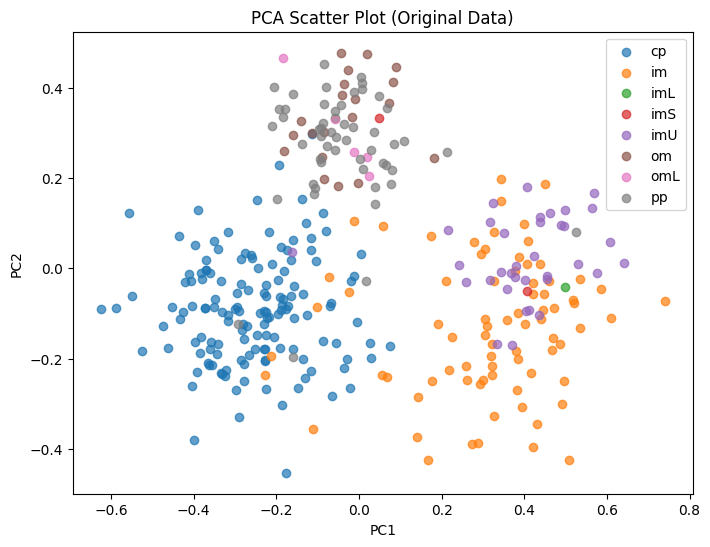

In [12]:
# === 4. Visualisasi original data (PCA) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
for label in np.unique(y):
    idx = (y == label)
    plt.scatter(X_pca[idx,0], X_pca[idx,1], label=label, alpha=0.7)

plt.title("PCA Scatter Plot (Original Data)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(); plt.show()

### Lakukan penyeimbangan data menggunakan SMOTE

In [13]:
from imblearn.over_sampling import SMOTE
print("Distribusi kelas sebelum balancing:", Counter(y))

# === 5. Balancing dengan SMOTE (lebih stabil) ===
min_class_size = min(Counter(y).values())
n_neighbors = max(1, min_class_size - 1)
print(f"Gunakan n_neighbors = {n_neighbors}")

smote = SMOTE(random_state=42, k_neighbors=n_neighbors)
X_res, y_res = smote.fit_resample(X, y)

print("Distribusi kelas setelah balancing:", Counter(y_res))

Distribusi kelas sebelum balancing: Counter({'cp': 143, 'im': 77, 'pp': 52, 'imU': 35, 'om': 20, 'omL': 5, 'imS': 2, 'imL': 2})
Gunakan n_neighbors = 1
Distribusi kelas setelah balancing: Counter({'im': 143, 'cp': 143, 'pp': 143, 'imU': 143, 'imS': 143, 'om': 143, 'imL': 143, 'omL': 143})


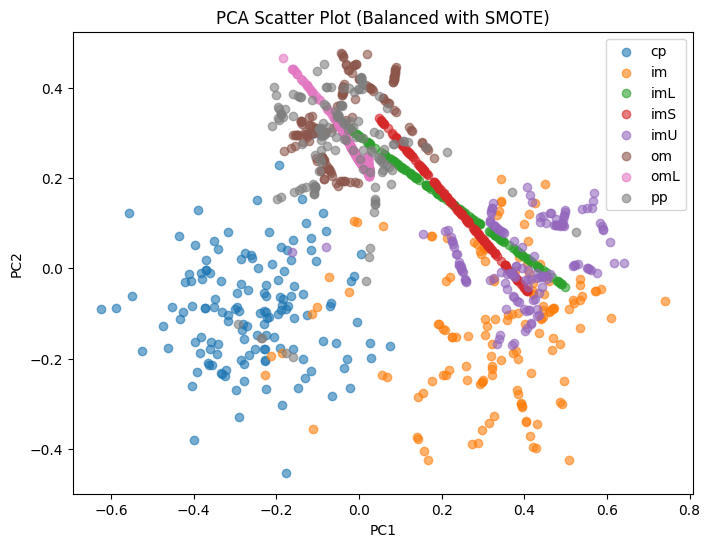

In [14]:
# === 6. Visualisasi setelah balancing ===
X_res_pca = pca.transform(X_res)

plt.figure(figsize=(8,6))
for label in np.unique(y_res):
    idx = (y_res == label)
    plt.scatter(X_res_pca[idx,0], X_res_pca[idx,1], label=label, alpha=0.6)

plt.title("PCA Scatter Plot (Balanced with SMOTE)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.legend(); plt.show()

### Klasifikasi NAIVE BAYES sebelum SMOTE

=== Hasil Naive Bayes SEBELUM SMOTE ===
Akurasi: 0.8316831683168316

Classification Report:
              precision    recall  f1-score   support

          cp       0.96      1.00      0.98        43
          im       0.76      0.70      0.73        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.50      0.40      0.44        10
          om       1.00      0.67      0.80         6
         omL       0.50      1.00      0.67         1
          pp       0.76      1.00      0.86        16

    accuracy                           0.83       101
   macro avg       0.56      0.60      0.56       101
weighted avg       0.81      0.83      0.82       101



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


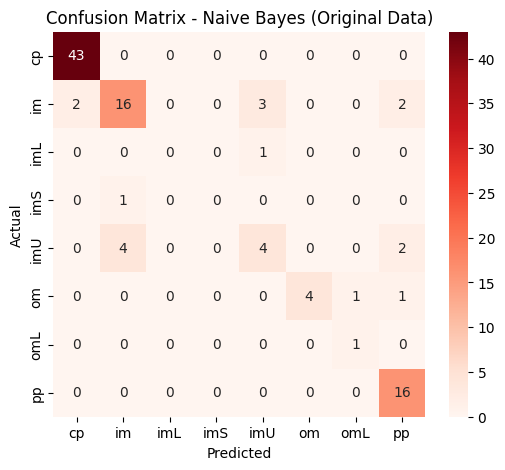

In [15]:
# === Klasifikasi Naive Bayes SEBELUM SMOTE ===
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

# 1. Split data original
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 2. Model Naive Bayes
nb_ori = GaussianNB()
nb_ori.fit(X_train_ori, y_train_ori)

# 3. Prediksi
y_pred_ori = nb_ori.predict(X_test_ori)

# 4. Evaluasi
print("=== Hasil Naive Bayes SEBELUM SMOTE ===")
print("Akurasi:", accuracy_score(y_test_ori, y_pred_ori))
print("\nClassification Report:")
print(classification_report(y_test_ori, y_pred_ori))

# Confusion Matrix
cm_ori = confusion_matrix(y_test_ori, y_pred_ori)

plt.figure(figsize=(6,5))
sns.heatmap(cm_ori, annot=True, fmt="d", cmap="Reds",
            xticklabels=np.unique(y),
            yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Original Data)")
plt.show()


### Klasifikasi NAIVE BAYES sesudah SMOTE

=== Hasil Naive Bayes SESUDAH SMOTE ===
Akurasi: 0.7761627906976745

Classification Report:
              precision    recall  f1-score   support

          cp       0.93      0.98      0.95        43
          im       0.49      0.93      0.64        43
         imL       1.00      1.00      1.00        43
         imS       0.98      1.00      0.99        43
         imU       0.67      0.05      0.09        43
          om       1.00      0.33      0.49        43
         omL       1.00      1.00      1.00        43
          pp       0.57      0.93      0.71        43

    accuracy                           0.78       344
   macro avg       0.83      0.78      0.73       344
weighted avg       0.83      0.78      0.73       344



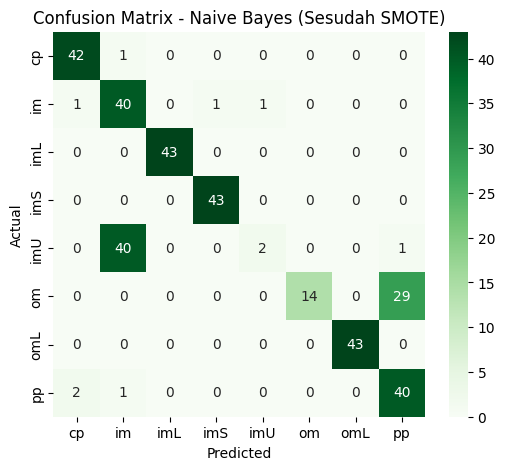

In [17]:
# === Klasifikasi Naive Bayes SESUDAH SMOTE ===

# 1. Split data setelah SMOTE
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# 2. Model Naive Bayes
nb_bal = GaussianNB()
nb_bal.fit(X_train_bal, y_train_bal)

# 3. Prediksi
y_pred_bal = nb_bal.predict(X_test_bal)

# 4. Evaluasi
print("=== Hasil Naive Bayes SESUDAH SMOTE ===")
print("Akurasi:", accuracy_score(y_test_bal, y_pred_bal))
print("\nClassification Report:")
print(classification_report(y_test_bal, y_pred_bal))

# Confusion Matrix
cm_bal = confusion_matrix(y_test_bal, y_pred_bal)

plt.figure(figsize=(6,5))
sns.heatmap(cm_bal, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_res),
            yticklabels=np.unique(y_res))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Sesudah SMOTE)")
plt.show()

### Perbandingan sebelum dan sesudah Smote

In [ ]:
accuracy_bal = accuracy_score(y_test_bal, y_pred_bal)
precision_bal = precision_score(y_test_bal, y_pred_bal, average="macro")
recall_bal = recall_score(y_test_bal, y_pred_bal, average="macro")
f1_bal = f1_score(y_test_bal, y_pred_bal, average="macro")


results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"],
    "Sebelum SMOTE": [accuracy_ori, precision_ori, recall_ori, f1_ori],
    "Sesudah SMOTE": [accuracy_bal, precision_bal, recall_bal, f1_bal]
})

print(results)

              Metric  Sebelum SMOTE  Sesudah SMOTE
0           Accuracy       0.831683       0.776163
1  Precision (macro)       0.559921       0.829563
2     Recall (macro)       0.595290       0.776163
3   F1-score (macro)       0.560065       0.733650


### Klasifikasi RANDOM FOREST Sebelum ADASYN

In [21]:
from sklearn.ensemble import RandomForestClassifier
# Sebelum balancing
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Data asli
rf_ori = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = rf_ori.predict(X_test_ori)

print("\n--- Random Forest Sebelum Balancing ---")
print("Accuracy:", accuracy_score(y_test_ori, y_pred_ori))
print("Confusion Matrix:\n", confusion_matrix(y_test_ori, y_pred_ori))
print("Classification Report:\n", classification_report(y_test_ori, y_pred_ori))


--- Random Forest Sebelum Balancing ---
Accuracy: 0.8613861386138614
Confusion Matrix:
 [[43  0  0  0  0  0  0  0]
 [ 0 21  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  5  0  0  5  0  0  0]
 [ 0  0  0  0  0  5  0  1]
 [ 0  0  0  0  0  0  1  0]
 [ 2  2  0  0  0  0  0 12]]
Classification Report:
               precision    recall  f1-score   support

          cp       0.96      1.00      0.98        43
          im       0.70      0.91      0.79        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.71      0.50      0.59        10
          om       1.00      0.83      0.91         6
         omL       1.00      1.00      1.00         1
          pp       0.92      0.75      0.83        16

    accuracy                           0.86       101
   macro avg       0.66      0.62      0.64       101
weighted avg       0.85      0.86      0.85       101



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Klasifikasi RANDOM FOREST Sesudah ADASYN

In [22]:
# Setelah balancing
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

rf_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_bal.predict(X_test_bal)

print("\n--- Random Forest Setelah ADASYN Manual ---")
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test_bal, y_pred_bal))
print("Classification Report:\n", classification_report(y_test_bal, y_pred_bal))


--- Random Forest Setelah ADASYN Manual ---
Accuracy: 0.9622093023255814
Confusion Matrix:
 [[43  0  0  0  0  0  0  0]
 [ 1 40  0  0  2  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 1  6  0  0 36  0  0  0]
 [ 0  0  0  0  0 42  0  1]
 [ 0  0  0  0  0  0 43  0]
 [ 1  1  0  0  0  0  0 41]]
Classification Report:
               precision    recall  f1-score   support

          cp       0.93      1.00      0.97        43
          im       0.85      0.93      0.89        43
         imL       1.00      1.00      1.00        43
         imS       1.00      1.00      1.00        43
         imU       0.95      0.84      0.89        43
          om       1.00      0.98      0.99        43
         omL       1.00      1.00      1.00        43
          pp       0.98      0.95      0.96        43

    accuracy                           0.96       344
   macro avg       0.96      0.96      0.96       344
weighted avg       0.96      0.96      0.96       344



### Perbandingan Sebelum dan sesudah ADASYN

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# ===============================
# 1. Hitung metric Sebelum ADASYN
# ===============================
accuracy_ori = accuracy_score(y_test_ori, y_pred_ori)
precision_ori = precision_score(y_test_ori, y_pred_ori, average="macro")
recall_ori = recall_score(y_test_ori, y_pred_ori, average="macro")
f1_ori = f1_score(y_test_ori, y_pred_ori, average="macro")

# ===============================
# 2. Hitung metric Sesudah ADASYN
# ===============================
accuracy_bal = accuracy_score(y_test_bal, y_pred_bal)
precision_bal = precision_score(y_test_bal, y_pred_bal, average="macro")
recall_bal = recall_score(y_test_bal, y_pred_bal, average="macro")
f1_bal = f1_score(y_test_bal, y_pred_bal, average="macro")

# ===============================
# 3. Buat tabel perbandingan
# ===============================
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"],
    "Sebelum ADASYN": [accuracy_ori, precision_ori, recall_ori, f1_ori],
    "Sesudah ADASYN": [accuracy_bal, precision_bal, recall_bal, f1_bal]
})

print(results)


              Metric  Sebelum ADASYN  Sesudah ADASYN
0           Accuracy        0.861386        0.962209
1  Precision (macro)        0.661615        0.963676
2     Recall (macro)        0.624547        0.962209
3   F1-score (macro)        0.636830        0.962126


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Klasifikasi RANDOM FOREST Sebelum SMOTE

In [24]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Data asli
X_train_ori, X_test_ori, y_train_ori, y_test_ori = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

rf_ori = RandomForestClassifier(n_estimators=100, random_state=42)
rf_ori.fit(X_train_ori, y_train_ori)
y_pred_ori = rf_ori.predict(X_test_ori)

print("\n--- Random Forest Sebelum Balancing ---")
print("Accuracy:", accuracy_score(y_test_ori, y_pred_ori))
print("Confusion Matrix:\n", confusion_matrix(y_test_ori, y_pred_ori))
print("Classification Report:\n", classification_report(y_test_ori, y_pred_ori))


--- Random Forest Sebelum Balancing ---
Accuracy: 0.8613861386138614
Confusion Matrix:
 [[43  0  0  0  0  0  0  0]
 [ 0 21  0  0  2  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  5  0  0  5  0  0  0]
 [ 0  0  0  0  0  5  0  1]
 [ 0  0  0  0  0  0  1  0]
 [ 2  2  0  0  0  0  0 12]]
Classification Report:
               precision    recall  f1-score   support

          cp       0.96      1.00      0.98        43
          im       0.70      0.91      0.79        23
         imL       0.00      0.00      0.00         1
         imS       0.00      0.00      0.00         1
         imU       0.71      0.50      0.59        10
          om       1.00      0.83      0.91         6
         omL       1.00      1.00      1.00         1
          pp       0.92      0.75      0.83        16

    accuracy                           0.86       101
   macro avg       0.66      0.62      0.64       101
weighted avg       0.85      0.86      0.85       101



/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Klasifikasi RANDOM FOREST Sesudah SMOTE

In [25]:
# Data setelah SMOTE
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

rf_bal = RandomForestClassifier(n_estimators=100, random_state=42)
rf_bal.fit(X_train_bal, y_train_bal)
y_pred_bal = rf_bal.predict(X_test_bal)

print("\n--- Random Forest Setelah SMOTE ---")
print("Accuracy:", accuracy_score(y_test_bal, y_pred_bal))
print("Confusion Matrix:\n", confusion_matrix(y_test_bal, y_pred_bal))
print("Classification Report:\n", classification_report(y_test_bal, y_pred_bal))



--- Random Forest Setelah SMOTE ---
Accuracy: 0.9622093023255814
Confusion Matrix:
 [[43  0  0  0  0  0  0  0]
 [ 1 40  0  0  2  0  0  0]
 [ 0  0 43  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0]
 [ 1  6  0  0 36  0  0  0]
 [ 0  0  0  0  0 42  0  1]
 [ 0  0  0  0  0  0 43  0]
 [ 1  1  0  0  0  0  0 41]]
Classification Report:
               precision    recall  f1-score   support

          cp       0.93      1.00      0.97        43
          im       0.85      0.93      0.89        43
         imL       1.00      1.00      1.00        43
         imS       1.00      1.00      1.00        43
         imU       0.95      0.84      0.89        43
          om       1.00      0.98      0.99        43
         omL       1.00      1.00      1.00        43
          pp       0.98      0.95      0.96        43

    accuracy                           0.96       344
   macro avg       0.96      0.96      0.96       344
weighted avg       0.96      0.96      0.96       344



### Perbandingan Sebelum dan sesudah SMOTE

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# ===============================
# 1. Hitung metric Sebelum SMOTE
# ===============================
accuracy_ori = accuracy_score(y_test_ori, y_pred_ori)
precision_ori = precision_score(y_test_ori, y_pred_ori, average="macro")
recall_ori = recall_score(y_test_ori, y_pred_ori, average="macro")
f1_ori = f1_score(y_test_ori, y_pred_ori, average="macro")

# ===============================
# 2. Hitung metric Sesudah SMOTE
# ===============================
accuracy_bal = accuracy_score(y_test_bal, y_pred_bal)
precision_bal = precision_score(y_test_bal, y_pred_bal, average="macro")
recall_bal = recall_score(y_test_bal, y_pred_bal, average="macro")
f1_bal = f1_score(y_test_bal, y_pred_bal, average="macro")

# ===============================
# 3. Buat tabel perbandingan
# ===============================
results = pd.DataFrame({
    "Metric": ["Accuracy", "Precision (macro)", "Recall (macro)", "F1-score (macro)"],
    "Sebelum SMOTE": [accuracy_ori, precision_ori, recall_ori, f1_ori],
    "Sesudah SMOTE": [accuracy_bal, precision_bal, recall_bal, f1_bal]
})

print(results)


              Metric  Sebelum SMOTE  Sesudah SMOTE
0           Accuracy       0.861386       0.962209
1  Precision (macro)       0.661615       0.963676
2     Recall (macro)       0.624547       0.962209
3   F1-score (macro)       0.636830       0.962126


/usr/local/python/3.12.1/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
